# 세 번째 복사
### 목표 : 생선 품종 분류 모델
  - 데이터 : 2가지 품종의 생선 데이터
  - 피처 : Weight, Length
  - 타겟 : Species
  - 유형 : 지도학습 / 분류

### 4) 학습 진행~ 부터 수정 : 매개변수에 따른 학습 모듈 성능 확인을 위함

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier  # 기계학습 관련 모듈

In [3]:
# 데이터 불러오기
data_file = pd.read_csv('../DATA/fish.csv', encoding='utf-8')
data_file

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [4]:
# 2개의 피처만 선택
fish_df = pd.DataFrame(data_file, columns=['Species', 'Weight', 'Length'])
# fish_df = pd.read_csv('../DATA/fish.csv', usecols=['Species', 'Weight', 'Length'])
fish_df

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0
...,...,...,...
154,Smelt,12.2,12.2
155,Smelt,13.4,12.4
156,Smelt,12.2,13.0
157,Smelt,19.7,14.3


In [5]:
# Bream, Smelt 품종만 추출
mask = fish_df.Species.isin(['Bream', 'Smelt'])
two_species_df = fish_df[mask]

# index 정리
two_species_df.reset_index(drop=True, inplace=True)
two_species_df

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0
5,Bream,450.0,29.7
6,Bream,500.0,29.7
7,Bream,390.0,30.0
8,Bream,450.0,30.0
9,Bream,500.0,30.7


#### 2) 데이터 전처리

In [6]:
# 타겟 bool 처리
# two_species_df['Species'] = two_species_df['Species'].replace({'Bream': 0, 'Smelt': 1}).copy()
# - 오류 해결 방법 :
# 1) slice copy warning    : .loc[:, ]
# 2) type -> object        : .copy(deep=True)
two_species_df.loc[:, 'Species'] = two_species_df['Species'].replace({'Bream': 0, 'Smelt': 1}).copy(deep=True)
two_species_df.dtypes

Species     object
Weight     float64
Length     float64
dtype: object

In [7]:
# Species -> int로 변환
two_species_df['Species'] = two_species_df['Species'].astype(int)
two_species_df.dtypes

C:\Users\wjs31\AppData\Local\Temp\ipykernel_32116\1326719769.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  two_species_df['Species'] = two_species_df['Species'].astype(int)


Species      int32
Weight     float64
Length     float64
dtype: object

### (새로 입력된 구간) 

### 2) 데이터 전처리
- 정제 : 결측치, 중복값, 이상치 처리
- 정규화 : 피쳐 스케일링

In [8]:
# 표준 정규분포 => 평균 0, 표준편차 1
# : Weight처럼 값이 너무 커 타 데이터와 비교하기 어려운 경우
#   정규화 해버리기
two_species_df.describe()   # Weight = mean : 444.5, std : 328.14

,Species,Weight,Length
count,49.000000,49.000000,49.000000
mean,0.285714,444.500000,27.055102
std,0.456435,328.143233,10.242804
min,0.000000,6.700000,9.800000
25%,0.000000,19.700000,14.300000
50%,0.000000,500.000000,31.000000
75%,1.000000,700.000000,34.500000
max,1.000000,1000.000000,41.000000


In [9]:
# Weight 정규화
ret1 = two_species_df.Weight - two_species_df.Weight.mean()
ret1 = ret1 / two_species_df.Weight.std()
two_species_df.loc[:, 'Weight'] = ret1
two_species_df

# 학습용 데이터만으로 평균과 표준편차를 구해야한다

,Species,Weight,Length
0,0,-0.617109,25.4
1,0,-0.470831,26.3
2,0,-0.318458,26.5
3,0,-0.248367,29.0
4,0,-0.044188,29.0
5,0,0.016761,29.7
6,0,0.169133,29.7
7,0,-0.166086,30.0
8,0,0.016761,30.0
9,0,0.169133,30.7


In [10]:
# 이걸 다 해주는 모듈 존재!

### 3) 피처와 타겟 분리

In [11]:
# 피처 데이터 추출 
# : 피처와 타겟을 나눈 후 연산
#   연산 후 나눠도 상관 없음
feature_df = two_species_df[two_species_df.columns[1:]]
feature_df.head(2)

,Weight,Length
0,-0.617109,25.4
1,-0.470831,26.3


In [12]:
# 타겟 데이터도 추출
target_SR = two_species_df['Species']
target_SR.head(2)

0    0
1    0
Name: Species, dtype: int32

### 3-1) 학습/테스트 데이터셋 분리

In [13]:
# 모듈 로딩
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    feature_df, target_SR, test_size=0.2, stratify=target_SR)

In [15]:
# 학습 및 테스트 데이터셋 확인
print(f'학습용 데이터셋 --->', X_train.shape, y_train.shape)
print(y_train.value_counts()/y_train.shape[0])

print(f'테스트 데이터셋 --->', X_test.shape, y_test.shape)
print(y_test.value_counts()/y_test.shape[0])

학습용 데이터셋 ---> (39, 2) (39,)
Species
0    0.717949
1    0.282051
Name: count, dtype: float64
테스트 데이터셋 ---> (10, 2) (10,)
Species
0    0.7
1    0.3
Name: count, dtype: float64


### 3-2) 피처 데이터의 스케일링
- 피처들의 값의 범위가 다른 것을 통일
- scikit-learn의 preprocessing 사용

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
# 표준 정규분포 스케일링 : 평균 0, 편차 1
# 1) 스케일러 인스턴스 생성
# 2) 데이터에 대한 평균, 표준편차 계산 진행 : fit()
# 3) 데이터 스케일링                        : transform()

In [18]:
scaler = StandardScaler()

In [19]:
scaler.fit(X_train)

StandardScaler()

In [20]:
scaler.mean_    # .mean_ 인 이유 : 

array([ 0.03135748, 27.33846154])

In [21]:
# .transform : 스케일링
#              정규분포로 바꿈
scaler.transform(X_train)

array([[-1.34968561, -1.52725809],
       [ 0.36468823,  0.6547552 ],
       [-1.34270797, -1.48794254],
       [-0.49993138, -0.10206923],
       [ 1.65403327,  0.94962186],
       [ 0.74390736,  0.55646632],
       [ 1.57818944,  1.34277741],
       [ 0.13715675,  0.40903298],
       [-1.31995483, -1.28153588],
       [-0.64555153, -0.19052923],
       [ 1.51751438,  1.0970552 ],
       [-1.35029236, -1.6058892 ],
       [ 0.80458242,  0.75304409],
       [ 0.74390736,  0.75304409],
       [ 0.13715675,  0.33040187],
       [-0.0145309 ,  0.26159965],
       [ 1.19897031,  0.85133298],
       [ 0.44053205,  0.45817743],
       [-1.34938223, -1.52725809],
       [ 0.50120712,  0.70389965],
       [-0.0145309 ,  0.23211299],
       [ 1.50234561,  1.34277741],
       [-1.33906747, -1.46828476],
       [ 0.44053205,  0.45817743],
       [ 0.74390736,  0.55646632],
       [-1.31934808, -1.21273366],
       [-1.35848349, -1.64520476],
       [-1.35696661, -1.65503365],
       [ 0.7863799 ,

In [22]:
# 학습용 데이터 피처 스케일링
scaled_X_train = scaler.transform(X_train)
scaled_X_train.shape

(39, 2)

In [23]:
# 테스트용 데이터 피쳐 스케일링
scaled_X_test = scaler.transform(X_test)
scaled_X_test.shape

(10, 2)

In [24]:
# 모듈 로딩
# import matplotlib.pyplot as plt

In [25]:
# 스케일된 데이터 시각화 -> scaled_X_train
scaled_X_train.shape, scaled_X_train.ndim

((39, 2), 2)

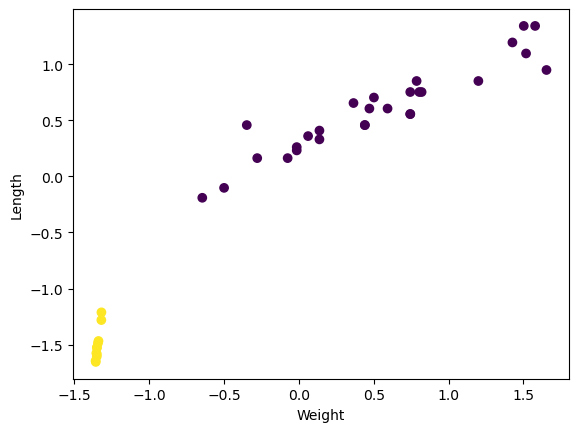

In [26]:
## Scale된 데이터 시각화 ==> x_train
plt.scatter(scaled_X_train[:, 0], scaled_X_train[:, 1], c = y_train)
plt.xlabel('Weight')
plt.ylabel('Length')
plt.show()

### 4) 학습 진행 : 매개변수 사용하기

In [27]:
# 방법 1 : KNN 알고리즘
# 모델 성능을 좌우하는 매개변수 => 하이퍼파라미터 : n_neighbors
# n_neighbors 즉 k 갯수 : 1 ~ 전체 데이터 수
max_k = scaled_X_train.shape[0]

score_list = []
for k in range(1, max_k+1):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(scaled_X_train, y_train)
    
    score_list.append(model.score(scaled_X_train, y_train))
    score_list.append(model.score(scaled_X_test, y_test))

In [31]:
# 학습 및 테스트 데이터에 대한 점수 확인
print(f'Train Score :', score_list[::2])
print(f'Test Score :', score_list[1::2])    

Train Score : [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718]
Test Score : [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7]


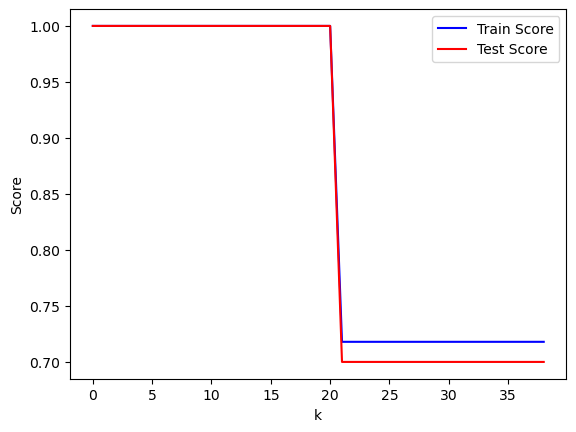

In [33]:
# k 개수에 따른 학습용/테스트용 점수 시각화
plt.plot(score_list[::2], color='blue', label='Train Score')
plt.plot(score_list[1::2], color='red', label='Test Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('Score')
plt.show()